In [48]:
from scipy.interpolate import make_interp_spline, BSpline

In [49]:
from statistics import mode

In [50]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

In [51]:
file = open('res_mod.txt')

string = file.readline()

data = [int(num)*0.001 for num in string.split(', ')[:-1]]

In [52]:
def get_optimalbinnumber(array):
    q3, q1 = np.percentile(array, [75 ,25])
    IQR = q3 - q1

    n = len(array)
    h = 2*IQR*n**(-1/3)
    print(max(array) - min(array))
    n = int((max(array) - min(array))/h)
    
    return n

## Hist

0.646


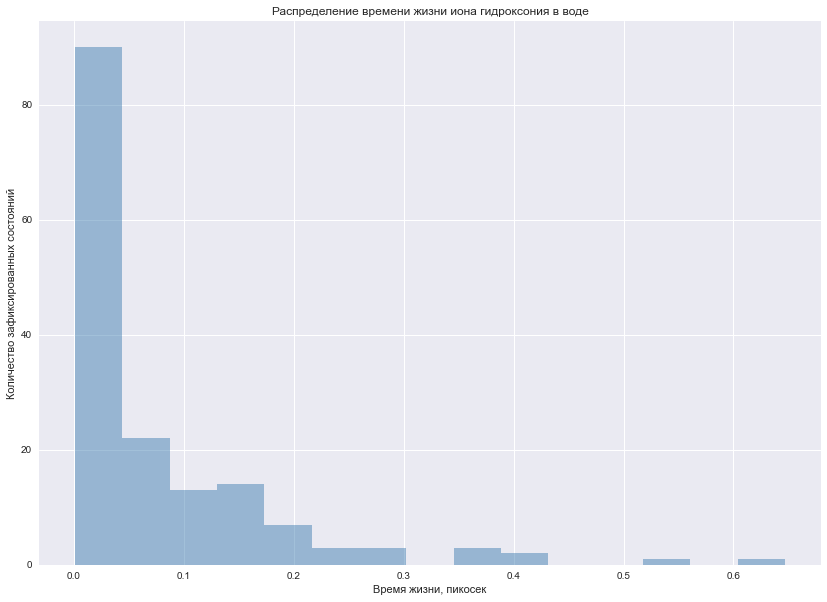

In [54]:
plt.figure(figsize = (14, 10)) #, dpi = 800)

plt.title('Распределение времени жизни иона гидроксония в воде')
plt.hist(data,color='steelblue',histtype= 'stepfilled', bins= get_optimalbinnumber(data), alpha = 0.5)
plt.ylabel('Количество зафиксированных состояний')
plt.xlabel('Время жизни, пикосек')
plt.show()
#plt.savefig('2.png', dpi=800)

In [66]:
mean = np.mean(data)
moda = mode(data)
hist, bins = np.histogram(data, bins= get_optimalbinnumber(data) )
center = bins[:-1]

xnew = np.linspace(center.min(), center.max(), 300) 
spl = make_interp_spline(center, hist, k=3)  # type: BSpline
power_smooth = spl(xnew)


plt.figure(figsize = (14, 10), dpi = 1000)
plt.title('Распределение времени жизни иона гидроксония в воде')
plt.ylabel('Количество зафиксированных состояний')
plt.xlabel('Время жизни, пикоссек')
plt.hist(data,color='steelblue',histtype= 'stepfilled', bins= get_optimalbinnumber(data), alpha = 0.5)
fig = plt
plt.savefig('1.png')
plt.plot(xnew, power_smooth, color = 'b', label = 'Сглаживающая кривая')
fig = plt
plt.savefig('2.png')
plt.vlines(mean, 0, 100, ls = '--', colors='k', label = 'Среднее')
plt.vlines(moda, 0, 100, ls = '--', colors='r', label = 'Мода')
fig = plt
plt.savefig('3.png')
#plt.plot(center, hist, color = 'b', label = 'Сглаживающая кривая')
plt.text(0.02, 100, 'Мода = ' + str(moda) + ', Среднее = ' + str(round(mean,3)), fontsize = 15) #, fontdict=font)
plt.legend()
#plt.grid()
#plt.show()
plt.savefig('Final_hist.png')

0.646
0.646


## Statistics

In [61]:
q3, q1 = np.percentile(data, [75 ,25])
IQR = q3 - q1

statistics = pd.DataFrame()
statistics['Среднее значение'] = df.mean()
statistics['Дисперсия'] = df.std()
statistics['Мода'] = moda
statistics['Медиана'] = df.median()
statistics['75%персентиль'] = q3
statistics['25%персентиль'] = q1
statistics['Интерквантильный размах'] = IQR
statistics['Максимальное значение'] = df.max()
statistics['Минимальное значение'] = df.min()

In [62]:
statistics

,Среднее значение,Дисперсия,Мода,Медиана,75%персентиль,25%персентиль,Интерквантильный размах,Максимальное значение,Минимальное значение
Время жизни,0.074553,0.106749,0.001,0.034,0.1125,0.003,0.1095,0.647,0.001


In [67]:
import os  
statistics.to_csv('res.csv')  